In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [29]:
df = pd.read_csv("wine_fraud.csv")

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [31]:
df.shape

(6497, 13)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [33]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [34]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

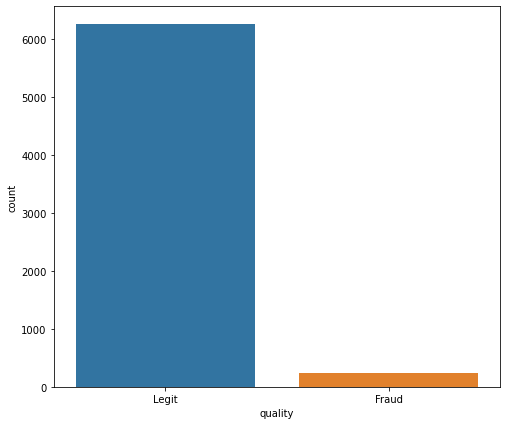

In [35]:
plt.figure(figsize = (8,7))
sns.countplot(data = df,x = 'quality');

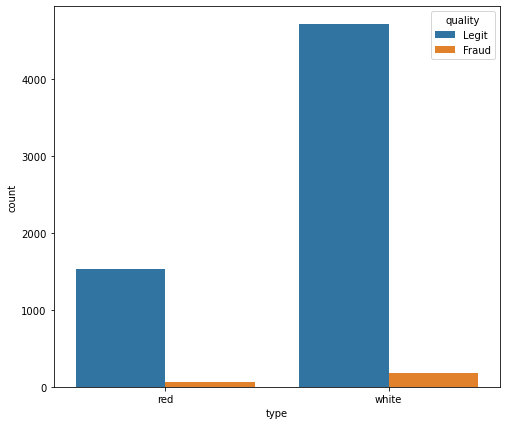

In [36]:
plt.figure(figsize = (8,7))
sns.countplot(data = df,x = 'type', hue = 'quality');

In [37]:
len(df[(df['quality'] == 'Fraud') & (df['type'] == 'red')]) / len(df[df['type'] == 'red']) *100

3.9399624765478425

In [38]:
len(df[(df['quality'] == 'Fraud') & (df['type'] == 'white')]) / len(df[df['type'] == 'white']) *100

3.7362188648427925

In [39]:
df['quality'] = df['quality'].replace(['Legit', 'Fraud'], [1,0])

In [40]:
corr = df.corr()['quality'].sort_values()[:-1]

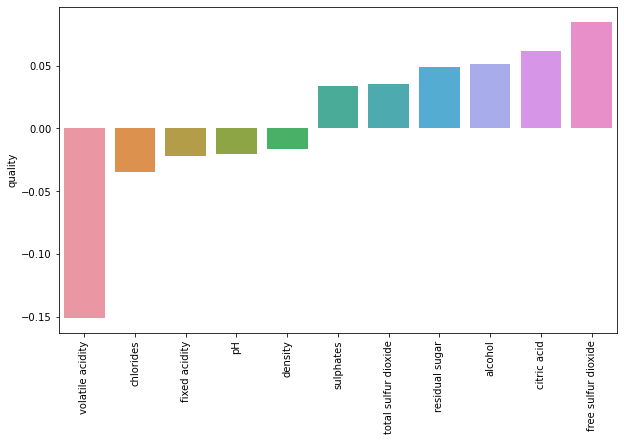

In [41]:
plt.figure(figsize = (10,6))
sns.barplot(x = corr.index ,y = corr)
plt.xticks(rotation = 90);

In [42]:
corr

volatile acidity       -0.151228
chlorides              -0.034499
fixed acidity          -0.021794
pH                     -0.020107
density                -0.016351
sulphates               0.034046
total sulfur dioxide    0.035252
residual sugar          0.048756
alcohol                 0.051141
citric acid             0.061789
free sulfur dioxide     0.085204
Name: quality, dtype: float64

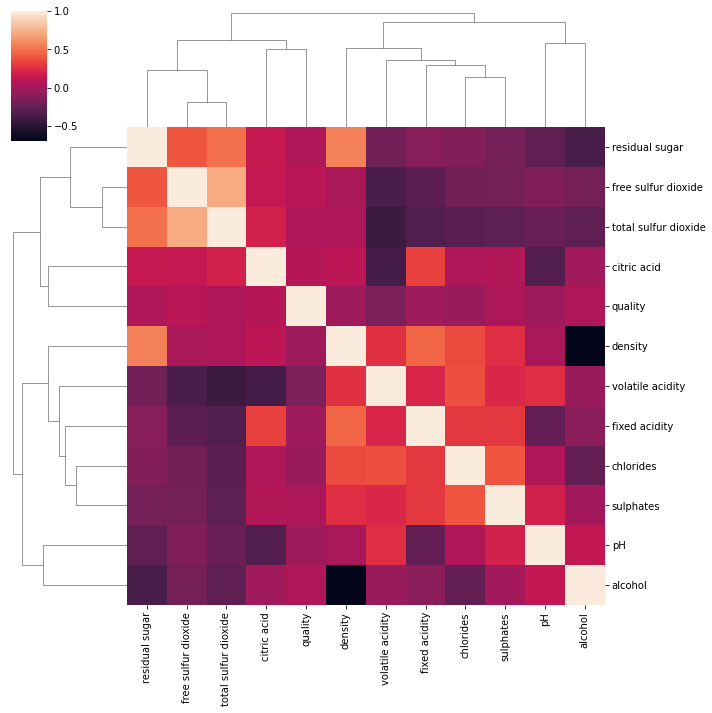

In [43]:
sns.clustermap(df.corr())

In [44]:
df['type'] = df['type'].replace(['red', 'white'], [1,0])

In [45]:
X = df.drop('quality', axis = 1)

In [46]:
y = df['quality']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [48]:
scaler = StandardScaler()

In [84]:
model = SVC(class_weight='balanced')

In [85]:
operations = [('scaler', scaler), ('model', model)]

In [86]:
pipe = Pipeline(operations)

In [87]:
param = {'model__C': [0.001,0.01,0.1,0.5,1],
         'model__gamma': ['scale', 'auto'],
         'model__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
         'model__degree': [2,3]}

In [88]:
grid = GridSearchCV(pipe, param_grid = param)

In [89]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        SVC(class_weight='balanced'))]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'model__degree': [2, 3],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [90]:
grid.best_params_

{'model__C': 0.001,
 'model__degree': 2,
 'model__gamma': 'scale',
 'model__kernel': 'poly'}

In [91]:
grid_pred = grid.predict(X_test)

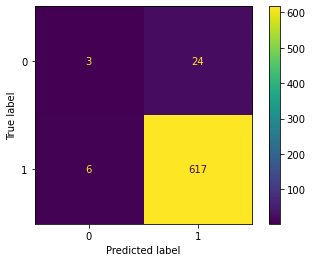

In [92]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [93]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.33      0.11      0.17        27
           1       0.96      0.99      0.98       623

    accuracy                           0.95       650
   macro avg       0.65      0.55      0.57       650
weighted avg       0.94      0.95      0.94       650



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


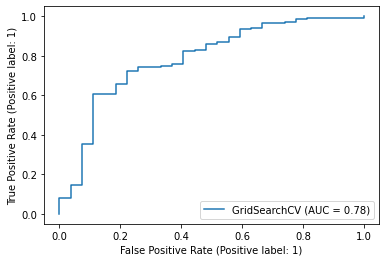

In [94]:
plot_roc_curve(grid, X_test, y_test)